In [6]:
import pymc as pm
import pytensor.tensor as pt
import pandas as pd
import numpy as np
import model
import arviz as az
import matplotlib.pyplot as plt
from utils import rcspline_eval

In [7]:
# Creating the pandas DataFrame from the given data
data = {
    'yi': [0.99, 0.54, -0.01, 1.29, 0.66, -0.12, 1.18, -0.23, 0.03, 0.73, 1.27, 0.38, -0.19, 0.01, 0.31, 1.41, 1.32, 1.22, 1.24, -0.05, 1.17, -0.17, 1.29, -0.07, 0.04, 1.03, -0.16, 1.25, 0.27, 0.27, 0.07, 0.02, 0.7, 1.64, 1.66, 1.4, 0.76, 0.8, 1.91, 1.27, 0.62, -0.29, 0.17, 1.05, -0.34, -0.21, 1.24, 0.2, 0.07, 0.21, 0.95, 1.71, -0.11, 0.17, 0.24, 0.78, 1.04, 0.2, 0.93, 1, 0.77, 0.47, 1.04, 0.22, 1.42, 1.24, 0.15, -0.53, 0.73, 0.98, 1.43, 0.35, 0.64, -0.09, 1.06, 0.36, 0.65, 1.05, 0.97, 1.28],
    'sei': np.sqrt([0.018, 0.042, 0.031, 0.022, 0.016, 0.013, 0.066, 0.043, 0.092, 0.009, 0.018, 0.034, 0.005, 0.005, 0.015, 0.155, 0.004, 0.124, 0.048, 0.006, 0.134, 0.022, 0.004, 0.043, 0.071, 0.01, 0.006, 0.128, 0.1, 0.156, 0.058, 0.044, 0.098, 0.154, 0.117, 0.013, 0.055, 0.034, 0.152, 0.022, 0.134, 0.038, 0.119, 0.145, 0.037, 0.123, 0.124, 0.081, 0.005, 0.026, 0.018, 0.039, 0.062, 0.012, 0.132, 0.02, 0.138, 0.065, 0.005, 0.013, 0.101, 0.051, 0.011, 0.018, 0.012, 0.059, 0.111, 0.073, 0.047, 0.01, 0.007, 0.055, 0.019, 0.104, 0.056, 0.006, 0.094, 0.009, 0.008, 0.02]),
    'xi': [9.4, 6.3, 1.9, 14.5, 8.4, 1.8, 11.3, 4.8, 0.7, 8.5, 15, 11.5, 4.5, 4.3, 4.3, 14.7, 11.4, 13.4, 11.5, 0.1, 12.3, 1.6, 14.6, 5.4, 2.8, 8.5, 2.9, 10.1, 0.2, 6.1, 4, 5.1, 12.4, 10.1, 13.3, 12.4, 7.6, 12.6, 12, 15.5, 4.9, 0.2, 6.4, 9.4, 1.7, 0.5, 8.4, 0.3, 4.3, 1.7, 15.2, 13.5, 6.4, 3.8, 8.2, 11.3, 11.9, 7.1, 9, 9.9, 7.8, 5.5, 9.9, 2.6, 15.5, 15.3, 0.2, 3.2, 10.1, 15, 10.3, 0, 8.8, 3.6, 15, 6.1, 3.4, 10.2, 10.1, 13.7]
}
df = pd.DataFrame(data)
df.xi.values

array([ 9.4,  6.3,  1.9, 14.5,  8.4,  1.8, 11.3,  4.8,  0.7,  8.5, 15. ,
       11.5,  4.5,  4.3,  4.3, 14.7, 11.4, 13.4, 11.5,  0.1, 12.3,  1.6,
       14.6,  5.4,  2.8,  8.5,  2.9, 10.1,  0.2,  6.1,  4. ,  5.1, 12.4,
       10.1, 13.3, 12.4,  7.6, 12.6, 12. , 15.5,  4.9,  0.2,  6.4,  9.4,
        1.7,  0.5,  8.4,  0.3,  4.3,  1.7, 15.2, 13.5,  6.4,  3.8,  8.2,
       11.3, 11.9,  7.1,  9. ,  9.9,  7.8,  5.5,  9.9,  2.6, 15.5, 15.3,
        0.2,  3.2, 10.1, 15. , 10.3,  0. ,  8.8,  3.6, 15. ,  6.1,  3.4,
       10.2, 10.1, 13.7])

In [20]:
X, knots = rcspline_eval(np.floor(df.xi).astype(int))
y = df.yi
ysd = df.sei 

In [21]:
X.shape

(80, 3)

In [22]:
trace, mod = model.meta_reg(X=X,y=y,ysd=ysd)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Output()

In [23]:
trace.posterior["mu"].stack(samples=("chain", "draw")).mean(axis=1)

<xarray.DataArray 'mu' (mu_dim_0: 80)>
array([ 0.95520994,  0.36540328, -0.08695151,  1.24789021,  0.76350878,
       -0.08695151,  1.23093349,  0.0573064 , -0.08924132,  0.76350878,
        1.19660894,  1.23093349,  0.0573064 ,  0.0573064 ,  0.0573064 ,
        1.24789021,  1.23093349,  1.28209143,  1.23093349, -0.08924132,
        1.28213254, -0.08695151,  1.24789021,  0.19199045, -0.07092286,
        0.76350878, -0.07092286,  1.11750363, -0.08924132,  0.36540328,
        0.0573064 ,  0.19199045,  1.28213254,  1.11750363,  1.28209143,
        1.28213254,  0.56131826,  1.28213254,  1.28213254,  1.19660894,
        0.0573064 , -0.08924132,  0.36540328,  0.95520994, -0.08695151,
       -0.08924132,  0.76350878, -0.08924132,  0.0573064 , -0.08695151,
        1.19660894,  1.28209143,  0.36540328, -0.0274165 ,  0.76350878,
        1.23093349,  1.23093349,  0.56131826,  0.95520994,  0.95520994,
        0.56131826,  0.19199045,  0.95520994, -0.07092286,  1.19660894,
        1.19660894, -0.08924132, -0.0274165 ,  1.11750363,  1.19660894,
        1.11750363, -0.08924132,  0.76350878, -0.0274165 ,  1.19660894,
        0.36540328, -0.0274165 ,  1.11750363,  1.11750363,  1.28209143])
Coordinates:
  * mu_dim_0  (mu_dim_0) int64 0 1 2 3 4 5 6 7 8 ... 71 72 73 74 75 76 77 78 79

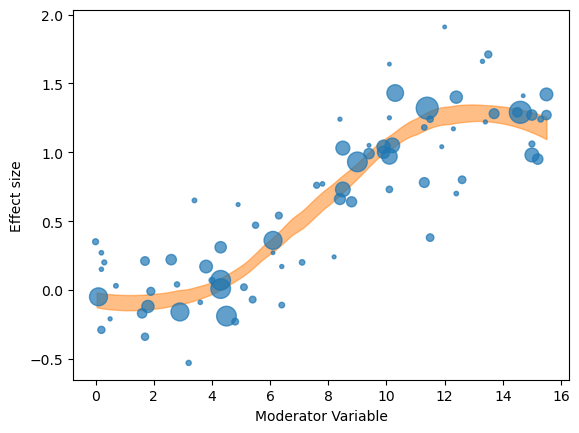

In [43]:
sizes = 1 / (df['sei']**2)

az.plot_hdi(df.xi.values, trace.posterior["mu"]);
plt.scatter(df['xi'], df['yi'], s=sizes, alpha=0.7);
plt.xlabel("Moderator Variable");
plt.ylabel("Effect size");

In [32]:
df.yi

0     0.99
1     0.54
2    -0.01
3     1.29
4     0.66
      ... 
75    0.36
76    0.65
77    1.05
78    0.97
79    1.28
Name: yi, Length: 80, dtype: float64